In [1888]:
!pip install openpyxl

In [1889]:
!pip install scikit-learn --upgrade --quiet

In [1890]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [1891]:
df = pd.DataFrame(pd.read_excel ("iis_data.xlsx"))

In [1892]:
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,High-Salary
0,203097,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,579905,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,810601,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,267447,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,343523,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,0
3994,752781,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0
3995,355888,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1
3996,947111,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,0


In [1893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Gender                 3998 non-null   object        
 2   DOB                    3998 non-null   datetime64[ns]
 3   10percentage           3998 non-null   float64       
 4   10board                3998 non-null   object        
 5   12graduation           3998 non-null   int64         
 6   12percentage           3998 non-null   float64       
 7   12board                3998 non-null   object        
 8   CollegeID              3998 non-null   int64         
 9   CollegeTier            3998 non-null   int64         
 10  Degree                 3998 non-null   object        
 11  Specialization         3998 non-null   object        
 12  collegeGPA             3998 non-null   float64       
 13  Col

**Exploratory Data Analysis and Visualization**



In [1894]:
px.histogram(df , x='CollegeTier',title='College Tier vs. Salary', color='High-Salary')

**According to the above plot, we can conclude that the students from Tier-1 college are likely to get high salary while students from Tier-2 college have almost 50-50 chance of getting a high or low salary depending on other factors.**

In [1895]:
px.histogram(df , x='Gender',title='Gender vs. Salary', color='High-Salary')

**In the above plot, we can analyse the type of salary (high/low) on the basis of the gender.**

In [1896]:
px.histogram(df , x='extraversion',title='Extraversion vs. Salary', color='High-Salary')

**Extraversion is one of the five personality traits of the Big Five personality theory. Extraversion indicates how outgoing and social a person is. The above plot indicates the distribution of salary on the basis of extraversion**

In [1897]:
px.scatter(df,title='Class 12 Percentage vs. Class 10 Percentage',x='12percentage',y='10percentage',color='High-Salary')

**As we can see from above plot, mostly those students who got good marks (almost above 80 %) both in class 10th and 12th got high salary jobs in future**

**Training, Validation and Test Sets**

In [1898]:
from sklearn.model_selection import train_test_split

**Test Data - 20% , Training Data - 60%, Validation Data - 20%**

In [1949]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state = 121)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state = 121)

In [1950]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (2398, 35)
val_df.shape : (800, 35)
test_df.shape : (800, 35)


**Identifying Input and Target Columns**

In [1951]:
input_columns = list(df[["Gender", "10percentage" ,	"10board" , "12percentage" , "12board" , "CollegeTier" , "Degree" , "Specialization" , "collegeGPA" , "CollegeCityID" , "CollegeState" , "GraduationYear" , "English" , "Logical" , "Quant" , "Domain" , "ComputerProgramming" , "ComputerScience" , "MechanicalEngg" , "ElectricalEngg" , "TelecomEngg" , "CivilEngg" , "conscientiousness" , "agreeableness" , "extraversion" , "nueroticism" , "openess_to_experience"]])

In [1952]:
target_column = 'High-Salary'

In [1953]:
print(input_columns)

['Gender', '10percentage', '10board', '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [1954]:
training_inputs = train_df[input_columns].copy()
training_target = train_df[target_column].copy()

In [1955]:
validating_inputs = val_df[input_columns].copy()
validating_target = val_df[target_column].copy()

In [1956]:
test_inputs = test_df[input_columns].copy()
test_target = test_df[target_column].copy()

In [1957]:
numeric_cols = training_inputs.select_dtypes(include=np.number).columns.tolist()
other_cols = training_inputs.select_dtypes('object').columns.tolist()

In [1958]:
training_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 1603 to 767
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   10percentage           2398 non-null   float64
 1   12percentage           2398 non-null   float64
 2   CollegeTier            2398 non-null   float64
 3   collegeGPA             2398 non-null   float64
 4   CollegeCityID          2398 non-null   float64
 5   GraduationYear         2398 non-null   float64
 6   English                2398 non-null   float64
 7   Logical                2398 non-null   float64
 8   Quant                  2398 non-null   float64
 9   Domain                 2398 non-null   float64
 10  ComputerProgramming    2398 non-null   float64
 11  ComputerScience        2398 non-null   float64
 12  MechanicalEngg         2398 non-null   float64
 13  ElectricalEngg         2398 non-null   float64
 14  TelecomEngg            2398 non-null   float64
 15  Ci

In [1959]:
training_inputs[other_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2398 entries, 1603 to 767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          2398 non-null   object
 1   10board         2398 non-null   object
 2   12board         2398 non-null   object
 3   Degree          2398 non-null   object
 4   Specialization  2398 non-null   object
 5   CollegeState    2398 non-null   object
dtypes: object(6)
memory usage: 131.1+ KB


**As we can see there are no NAN values in any of the columns of the dataframe. If there would have been any NAN values in dataframe, then we would have used the SimpleImputer of sklearn library to fill the missing values (we can replace NAN by mean/median/mode/any other fixed values in the columns)**

**Feature Scaling**

In [1960]:
df[numeric_cols].describe()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityID,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,0.637791,0.587161,0.925713,0.695723,0.280048,0.997574,0.462804,0.510998,0.504331,0.755279,0.421050,0.128132,0.038421,0.025797,0.059777,0.007119,0.667898,0.771245,0.645105,0.412637,0.786857
std,0.179879,0.187392,0.262270,0.087370,0.260893,0.015794,0.150993,0.144639,0.156798,0.234346,0.244180,0.244795,0.157249,0.129281,0.190819,0.070851,0.168028,0.122526,0.133328,0.168056,0.109596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.523740,0.442930,1.000000,0.641394,0.026729,0.997521,0.352518,0.416667,0.397436,0.671188,0.351962,0.000000,0.000000,0.000000,0.000000,0.000000,0.557526,0.714834,0.559968,0.296022,0.729118
50%,0.660153,0.586031,1.000000,0.698224,0.210626,0.998017,0.460432,0.516667,0.506410,0.811358,0.494649,0.000000,0.000000,0.000000,0.000000,0.000000,0.681656,0.779819,0.657526,0.401735,0.791620
75%,0.779218,0.725724,1.000000,0.747513,0.478948,0.998513,0.561151,0.616667,0.608974,0.921165,0.589774,0.000000,0.000000,0.000000,0.000000,0.000000,0.788860,0.857931,0.738884,0.528596,0.856492
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Using MinMaxScaler from sklearn.preprocessing for feature scaling**

In [1961]:
from sklearn.preprocessing import MinMaxScaler

In [1962]:
df['CivilEngg'] = df['CivilEngg'].replace(-1,0)
df['MechanicalEnggEngg'] = df['MechanicalEngg'].replace(-1,0)
df['ElectricalEngg'] = df['ElectricalEngg'].replace(-1,0)
df['TelecomEngg'] = df['TelecomEngg'].replace(-1,0)

In [1963]:
scaling = MinMaxScaler() 

In [1964]:
scaling.fit(df[numeric_cols])

MinMaxScaler()

In [1965]:
df[numeric_cols]=scaling.transform(df[numeric_cols])

In [1966]:
training_inputs[numeric_cols].describe()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityID,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.637370,0.587906,0.926606,0.696103,0.284491,0.997416,0.463801,0.513347,0.508775,0.756202,0.419764,0.128689,0.036471,0.025973,0.056468,0.007207,0.668483,0.771500,0.644698,0.416642,0.785814
std,0.179577,0.186600,0.260837,0.087101,0.261874,0.020387,0.149262,0.143480,0.155374,0.235308,0.246892,0.244880,0.151632,0.129612,0.187455,0.070459,0.168518,0.124041,0.135815,0.168899,0.111439
min,0.021183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041661
25%,0.525383,0.442930,1.000000,0.643640,0.027109,0.997521,0.359712,0.416667,0.403846,0.678299,0.340071,0.000000,0.000000,0.000000,0.000000,0.000000,0.568050,0.714834,0.559968,0.296022,0.729118
50%,0.661066,0.583901,1.000000,0.699294,0.218694,0.998017,0.460432,0.516667,0.519231,0.811358,0.494649,0.000000,0.000000,0.000000,0.000000,0.000000,0.681656,0.779819,0.657526,0.406874,0.791620
75%,0.777940,0.727428,1.000000,0.747192,0.479179,0.998513,0.561151,0.616667,0.608974,0.921165,0.589774,0.000000,0.000000,0.000000,0.000000,0.000000,0.788860,0.857931,0.738884,0.528596,0.856492
max,1.000000,1.000000,1.000000,0.990051,1.000000,1.000000,0.964029,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,0.976331,1.000000,0.968992,1.000000,1.000000,1.000000,1.000000,0.979104


**Encoding non-numerical data**

> We need to convert non-numerical data to numbers as ML models can only be trained using numerical data. One of the technique that we are going to use here is hot-encoding method.





In [1967]:
from sklearn.preprocessing import OneHotEncoder

In [1968]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [1969]:
other_cols

['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

In [1970]:
df2 = df[other_cols]
df2['10board'] = df['10board'].replace(0,str(0))
df2['12board'] = df['12board'].replace(0,str(0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1971]:
encoder.fit(df2)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [1972]:
encoded_cols = list(encoder.get_feature_names(other_cols))

In [1973]:
training_inputs[encoded_cols] = encoder.transform(training_inputs[other_cols])
validating_inputs[encoded_cols] = encoder.transform(validating_inputs[other_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[other_cols])

**Applying Logistic Regression**

In [1974]:
from sklearn.linear_model import LogisticRegression

In [1975]:
model = LogisticRegression(solver = 'lbfgs',max_iter=100000)

In [1976]:
model.fit(training_inputs[numeric_cols + encoded_cols], training_target)

LogisticRegression(max_iter=100000)

In [1977]:
print(numeric_cols + encoded_cols)

['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Gender_f', 'Gender_m', '10board_0', '10board_aisse', '10board_andhra pradesh board ssc', '10board_andhra pradesh state board', '10board_anglo indian', '10board_ap state board', '10board_ap state board for secondary education', '10board_apsche', '10board_apssc', '10board_aurangabad board', '10board_bharathi matriculation school', '10board_bihar', '10board_bihar board', '10board_bihar examination board, patna', '10board_bihar school examination board', '10board_bihar school examination board patna', '10board_bihar secondary education board,patna', '10board_biharboard', '10board_board of  secondary education', '10board_board of high school and intermediate

In [1999]:
print(model.coef_.tolist())

[[1.4330132862049156, 1.6584753512450234, -1.2152501120664274, 3.2188210386444016, -0.4970556491879268, -0.23082648618724672, 2.0313631246391433, 0.4776368385314412, 2.1824510007461604, 0.2627056002158051, 0.728000190637444, -0.446420710815111, -0.1663695623731466, -0.8231213576699075, -0.2895374128823916, 1.003384249466089, -0.35553803329135675, 0.5532864930610476, 0.12495591943259825, -0.5782216905400298, -0.7620606278222098, -0.1430546010247621, 0.1331950603514784, 0.0, -0.29999713915208415, 0.0, 0.0, 0.6739453213320696, 0.0, -0.631409206995827, 0.0, 0.08559895517375737, -0.5167629590200398, 0.0, 0.25035324285377997, -0.25778735249277845, -0.10653037476778969, -0.3295761666276606, -0.20039887199313047, 0.0, -0.24589597879845207, 0.096121241808574, -0.39014175779899174, 0.07467578847447745, 0.6032346406973065, 0.05308848999544279, 0.0, -0.1944227562937023, -0.4936005075917616, -0.4789776397003784, 0.10191372710169272, 0.09126900043161161, 0.0, 0.10495615140623671, 0.14802257183973916

In [2000]:
print(model.intercept_)

[-4.36913974]


In [2001]:
X_train = training_inputs[numeric_cols + encoded_cols]
X_val = validating_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [2002]:
train_preds = model.predict(X_train)

In [2003]:
test_preds = model.predict(X_test)

In [2004]:
val_preds = model.predict(X_val)

**Accuracy Measurement**

In [2005]:
from sklearn.metrics import accuracy_score

In [2006]:
accuracy_score(training_target, train_preds)

0.7606338615512928

In [2007]:
accuracy_score(test_target, test_preds)

0.70375

In [2008]:
accuracy_score(validating_target, val_preds)

0.70375

**Confusion Matrix**

In [2009]:
from sklearn.metrics import confusion_matrix

In [2010]:
label = np.array((0,1))

In [2011]:
train_cm = confusion_matrix(training_target, train_preds, normalize='true', labels = label)
pd.DataFrame(train_cm, index = label, columns = label)

,0,1
0,0.728173,0.271827
1,0.211344,0.788656


In [2012]:
test_cm = confusion_matrix(test_target, test_preds, normalize='true', labels = label)
pd.DataFrame(test_cm, index = label, columns = label)

,0,1
0,0.687003,0.312997
1,0.281324,0.718676


In [2013]:
val_cm = confusion_matrix(validating_target, val_preds, normalize='true', labels = label)
pd.DataFrame(val_cm, index = label, columns = label)

,0,1
0,0.674667,0.325333
1,0.270588,0.729412


**Class-Wise Accuracies**

In [2014]:
# Training data
print('For the training data :')
print('Class "0" has accuracy' , train_cm[0][0])
print('Class "1" has accuracy' , train_cm[1][1])

For the training data :
Class "0" has accuracy 0.7281728172817282
Class "1" has accuracy 0.7886557886557887


In [2015]:
# Testing data
print('For the testing data :')
print('Class "0" has accuracy' , test_cm[0][0])
print('Class "1" has accuracy' , test_cm[1][1])

For the testing data :
Class "0" has accuracy 0.6870026525198939
Class "1" has accuracy 0.7186761229314421


In [2016]:
# Validating data
print('For the validating data :')
print('Class "0" has accuracy' , val_cm[0][0])
print('Class "1" has accuracy' , val_cm[1][1])

For the validating data :
Class "0" has accuracy 0.6746666666666666
Class "1" has accuracy 0.7294117647058823


**Heatmaps for confusion matrix**

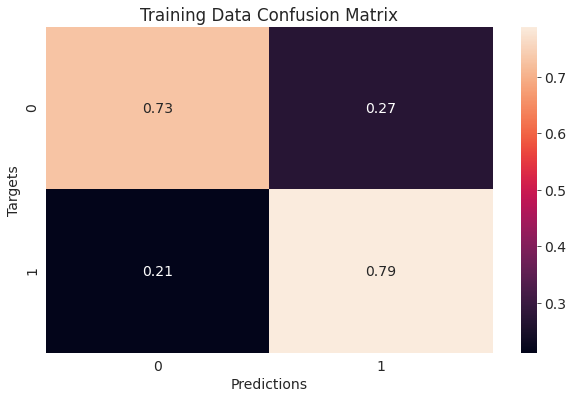

In [2017]:
plt.figure()
sns.heatmap(train_cm,annot=True)
plt.title('Training Data Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.show()

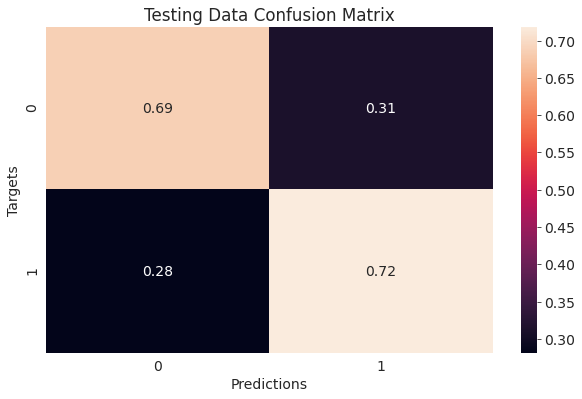

In [2018]:
plt.figure()
sns.heatmap(test_cm,annot=True)
plt.title('Testing Data Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.show()

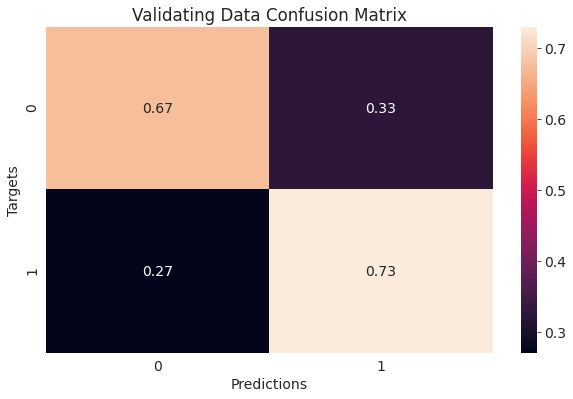

In [2019]:
plt.figure()
sns.heatmap(val_cm,annot=True)
plt.title('Validating Data Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.show()